In [61]:
import keras 
import numpy as np
from keras.layers.core import Dense, Dropout, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator



keras.__version__

'2.1.5'

In [62]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [63]:
len(x_train)

50000

In [64]:
len(y_test)

10000

In [65]:

#Each image is 32x32x3, where 3 is the number of channels. 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         147584    
__________

In [68]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



In [26]:
history = model.fit(x_train / 255.0, y_train,
          batch_size=128,
          shuffle=True,
          epochs=250,
          validation_data=(x_test / 255.0,y_test),
          callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/250
50000/50000 [==============================] - 13s 262us/step - loss: 0.8240 - acc: 0.7092 - val_loss: 0.7997 - val_acc: 0.7196
Epoch 2/250
50000/50000 [==============================] - 12s 250us/step - loss: 0.8046 - acc: 0.7182 - val_loss: 0.7874 - val_acc: 0.7228
Epoch 3/250
50000/50000 [==============================] - 13s 252us/step - loss: 0.7926 - acc: 0.7220 - val_loss: 0.7833 - val_acc: 0.7262
Epoch 4/250
50000/50000 [==============================] - 13s 251us/step - loss: 0.7795 - acc: 0.7268 - val_loss: 0.7788 - val_acc: 0.7237
Epoch 5/250
50000/50000 [==============================] - 13s 250us/step - loss: 0.7623 - acc: 0.7340 - val_loss: 0.7525 - val_acc: 0.7392
Epoch 6/250
50000/50000 [==============================] - 13s 252us/step - loss: 0.7526 - acc: 0.7377 - val_loss: 0.7509 - val_acc: 0.7380
Epoch 7/250
50000/50000 [==============================] - 13s 251us/step - loss: 0.7358 - acc: 0.7409 - val_l

In [69]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc ,'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo', label = 'Training loss')
plt.plot(epochs,val_loss,'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


NameError: name 'history' is not defined

In [28]:

scores = model.evaluate(x_test / 255.0, y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

10000/10000 [==============================] - 2s 179us/step
Loss: 0.613
Accuracy: 0.795


In [70]:
#The Adam Optimizer does much better than the RMSprop(lr=1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['acc'])



In [ ]:
history = model.fit(x_train / 255.0, y_train,
          batch_size=128,
          shuffle=True,
          epochs=250,
          validation_data=(x_test / 255.0,y_test),
          callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc ,'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo', label = 'Training loss')
plt.plot(epochs,val_loss,'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


NameError: name 'history' is not defined

In [ ]:
scores = model.evaluate(x_test / 255.0, y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

In [71]:
# In an effort to prevent overfitting we augment the data!
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

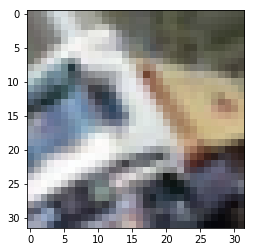

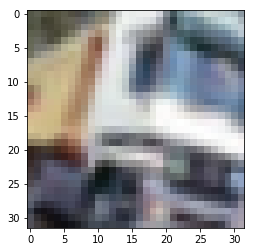

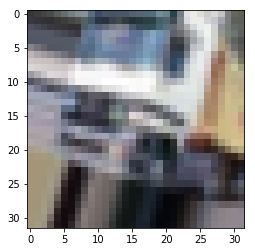

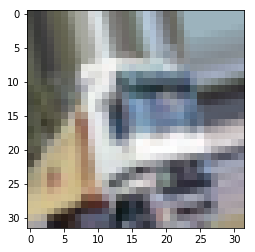

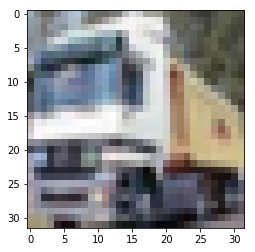

In [82]:
# Here We'll look at what the image augmentation actually looks like with an example on an image 
# of a truck from the dataset
from keras.preprocessing import image

import matplotlib.pyplot as plt
from scipy.misc import toimage

x = x_train[1]
# Rshape it to (1, 32, 32, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]), interpolation='nearest')
    i += 1
    if i % 4 == 0:
        break

plt.show()
#The original image
imgplot = plt.imshow(x_train[1], interpolation='nearest')
plt.show()

In [76]:
datagen.fit(x_train)
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                        steps_per_epoch=x_train.shape[0] // 128,
                        epochs=250,
                        validation_data=(x_test, y_test))

Epoch 1/250
390/390 [==============================] - 25s 64ms/step - loss: 2.8737 - acc: 0.1841 - val_loss: 1.8821 - val_acc: 0.3271
Epoch 2/250
390/390 [==============================] - 23s 60ms/step - loss: 1.9554 - acc: 0.2643 - val_loss: 1.8076 - val_acc: 0.3147
Epoch 3/250
390/390 [==============================] - 24s 61ms/step - loss: 1.8593 - acc: 0.3053 - val_loss: 1.6719 - val_acc: 0.3855
Epoch 4/250
390/390 [==============================] - 24s 61ms/step - loss: 1.7992 - acc: 0.3321 - val_loss: 1.6370 - val_acc: 0.3956
Epoch 5/250
390/390 [==============================] - 24s 61ms/step - loss: 1.7477 - acc: 0.3579 - val_loss: 1.5486 - val_acc: 0.4356
Epoch 6/250
390/390 [==============================] - 23s 60ms/step - loss: 1.6912 - acc: 0.3791 - val_loss: 1.6327 - val_acc: 0.4181
Epoch 7/250
390/390 [==============================] - 24s 61ms/step - loss: 1.6527 - acc: 0.3960 - val_loss: 1.5658 - val_acc: 0.4343
Epoch 8/250
390/390 [==============================] - 

390/390 [==============================] - 23s 60ms/step - loss: 1.0215 - acc: 0.6419 - val_loss: 0.8538 - val_acc: 0.6988
Epoch 61/250
390/390 [==============================] - 23s 60ms/step - loss: 1.0223 - acc: 0.6410 - val_loss: 0.8302 - val_acc: 0.7070
Epoch 62/250
390/390 [==============================] - 23s 60ms/step - loss: 1.0185 - acc: 0.6425 - val_loss: 0.8520 - val_acc: 0.7009
Epoch 63/250
390/390 [==============================] - 23s 59ms/step - loss: 1.0141 - acc: 0.6456 - val_loss: 0.8562 - val_acc: 0.7018
Epoch 64/250
390/390 [==============================] - 23s 59ms/step - loss: 1.0118 - acc: 0.6474 - val_loss: 0.8392 - val_acc: 0.7060
Epoch 65/250
390/390 [==============================] - 23s 59ms/step - loss: 1.0020 - acc: 0.6480 - val_loss: 0.8415 - val_acc: 0.7015
Epoch 66/250
390/390 [==============================] - 23s 59ms/step - loss: 0.9948 - acc: 0.6506 - val_loss: 0.8647 - val_acc: 0.6927
Epoch 67/250
390/390 [==============================] - 23s 5

390/390 [==============================] - 23s 59ms/step - loss: 0.8561 - acc: 0.7031 - val_loss: 0.6876 - val_acc: 0.7642
Epoch 121/250
390/390 [==============================] - 23s 60ms/step - loss: 0.8452 - acc: 0.7064 - val_loss: 0.6768 - val_acc: 0.7664
Epoch 122/250
390/390 [==============================] - 23s 60ms/step - loss: 0.8426 - acc: 0.7061 - val_loss: 0.6767 - val_acc: 0.7650
Epoch 123/250
390/390 [==============================] - 23s 59ms/step - loss: 0.8432 - acc: 0.7067 - val_loss: 0.7052 - val_acc: 0.7554
Epoch 124/250
390/390 [==============================] - 23s 59ms/step - loss: 0.8404 - acc: 0.7087 - val_loss: 0.6798 - val_acc: 0.7664
Epoch 125/250
390/390 [==============================] - 23s 60ms/step - loss: 0.8311 - acc: 0.7129 - val_loss: 0.6621 - val_acc: 0.7708
Epoch 126/250
390/390 [==============================] - 23s 59ms/step - loss: 0.8353 - acc: 0.7087 - val_loss: 0.6609 - val_acc: 0.7727
Epoch 127/250
390/390 [==============================] 

Epoch 180/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7612 - acc: 0.7367 - val_loss: 0.6354 - val_acc: 0.7862
Epoch 181/250
390/390 [==============================] - 23s 60ms/step - loss: 0.7655 - acc: 0.7326 - val_loss: 0.5968 - val_acc: 0.7975
Epoch 182/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7526 - acc: 0.7377 - val_loss: 0.6019 - val_acc: 0.7939
Epoch 183/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7505 - acc: 0.7414 - val_loss: 0.6338 - val_acc: 0.7872
Epoch 184/250
390/390 [==============================] - 23s 60ms/step - loss: 0.7533 - acc: 0.7374 - val_loss: 0.6515 - val_acc: 0.7795
Epoch 185/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7469 - acc: 0.7425 - val_loss: 0.6388 - val_acc: 0.7834
Epoch 186/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7464 - acc: 0.7400 - val_loss: 0.6257 - val_acc: 0.7838
Epoch 187/250
390/390 [==================

Epoch 240/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7077 - acc: 0.7556 - val_loss: 0.5561 - val_acc: 0.8099
Epoch 241/250
390/390 [==============================] - 23s 60ms/step - loss: 0.7022 - acc: 0.7574 - val_loss: 0.5914 - val_acc: 0.8036
Epoch 242/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7061 - acc: 0.7563 - val_loss: 0.5571 - val_acc: 0.8114
Epoch 243/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7057 - acc: 0.7560 - val_loss: 0.5375 - val_acc: 0.8202
Epoch 244/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7028 - acc: 0.7550 - val_loss: 0.5725 - val_acc: 0.8067
Epoch 245/250
390/390 [==============================] - 23s 59ms/step - loss: 0.6983 - acc: 0.7559 - val_loss: 0.5754 - val_acc: 0.8047
Epoch 246/250
390/390 [==============================] - 23s 59ms/step - loss: 0.7006 - acc: 0.7573 - val_loss: 0.5852 - val_acc: 0.8035
Epoch 247/250
390/390 [==================

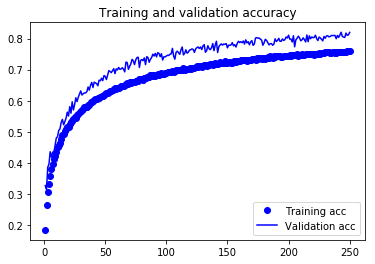

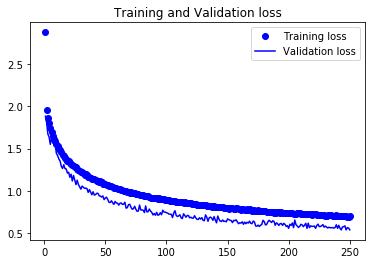

In [77]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc ,'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo', label = 'Training loss')
plt.plot(epochs,val_loss,'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [80]:
#Our final results...
scores = model.evaluate(x_test, y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

10000/10000 [==============================] - 2s 176us/step
Loss: 0.539
Accuracy: 0.820


In [ ]:
datagen.fit(x_train)
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                        steps_per_epoch=x_train.shape[0] // 128,
                        epochs=250,
                        validation_data=(x_test, y_test))